This notebook is the testing ground for features of the TSmode and ACTDR modules.

In [1]:
import ACTDR
import TSmode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata

%matplotlib inline

In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('paper')

In [13]:
ACTDR.reset_global()
ACTDR.load_dat('DB_v02.dat')

wcvi_top = TSmode.get_topo()

> open  DB_v02.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  DB_v02.dat
> complete


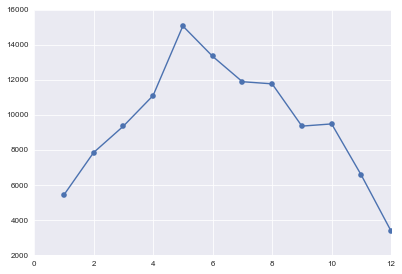

In [14]:
mnth_csts = []

for ii in range(1,13):
    mnth_csts.append(TSmode.filter_CTD_list('MONTH',ii))
    
csts_per_mnth = [len(k) for k in mnth_csts]

plt.plot(np.arange(1,13),csts_per_mnth,'-o')
#plt.semilogy(np.arange(1,13),csts_per_mnth,'-o')
plt.show()

In [15]:
# get June mode
Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[5])
print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]

S: 34.0 - 34.25
T: 4 - 5


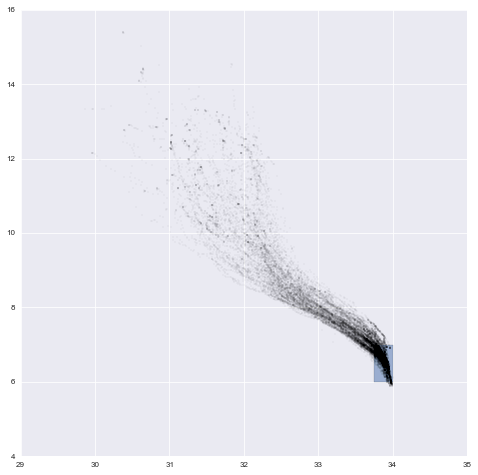

In [44]:
Scasts = [x for k in modeDAT for x in k['Salinity']]
Tcasts = [x for k in modeDAT for x in k['Temperature']]

plt.figure(figsize=(8,8))
plt.plot(Scasts,Tcasts,'.k',ms=1,alpha=0.25)
plt.fill_between([Sgr[modeIND[0]],Sgr[modeIND[0]+1]],[Tgr[modeIND[1]],Tgr[modeIND[1]]],[Tgr[modeIND[1]+1],Tgr[modeIND[1]+1]],alpha=0.5)
plt.show()

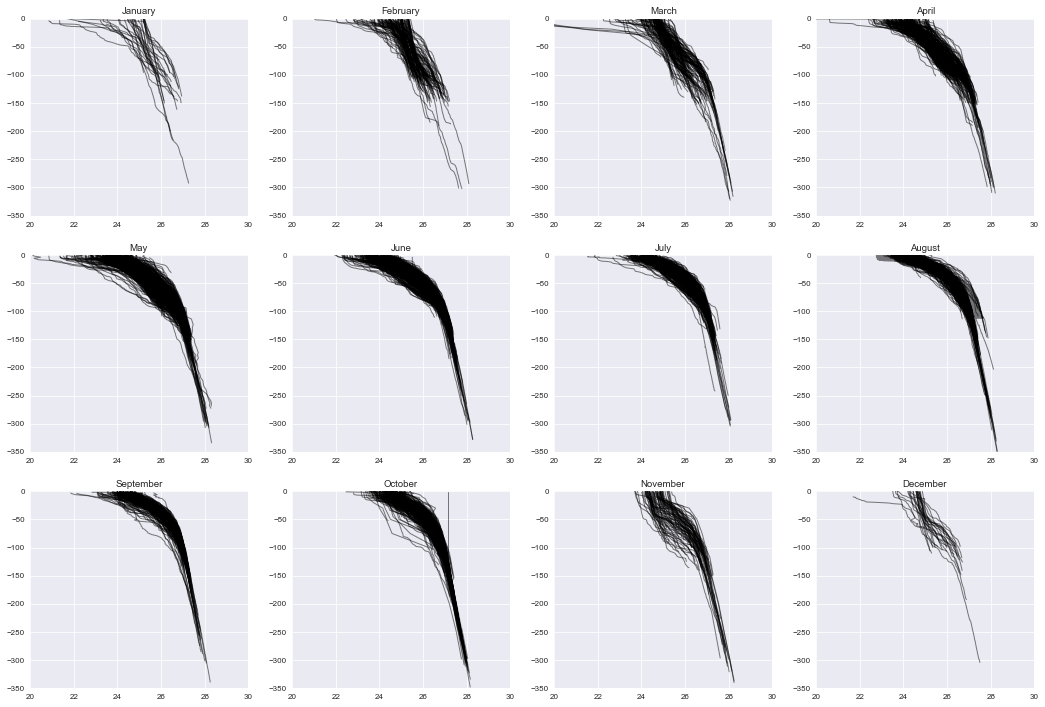

In [10]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['sigmaT'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((20,30))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

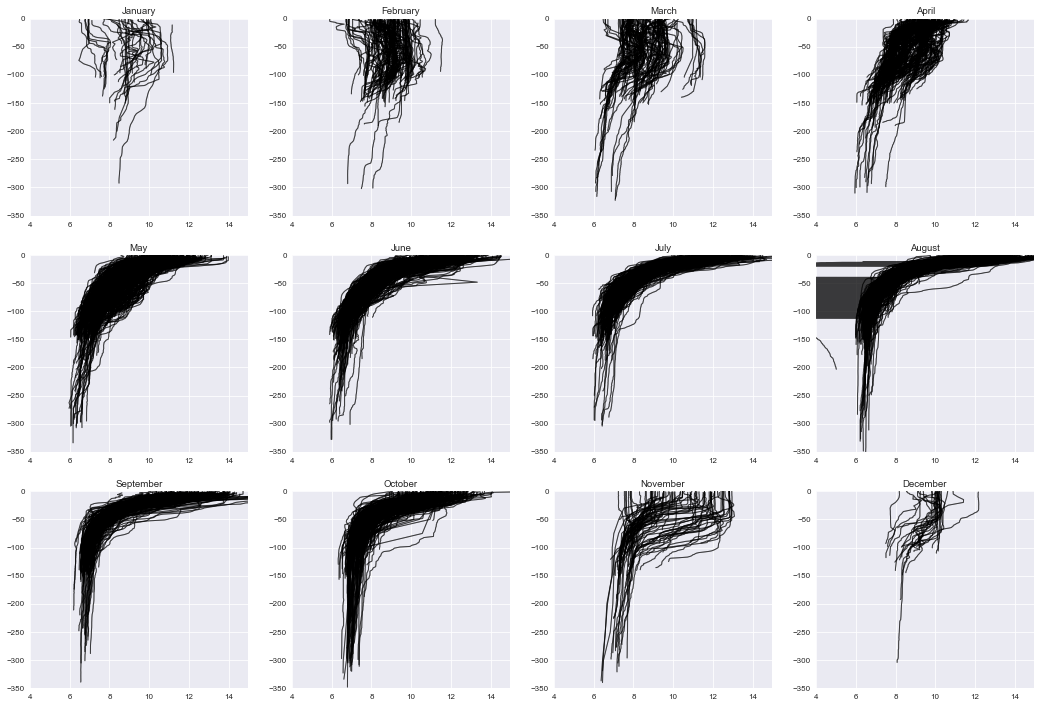

In [39]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['Temperature'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((4,15))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

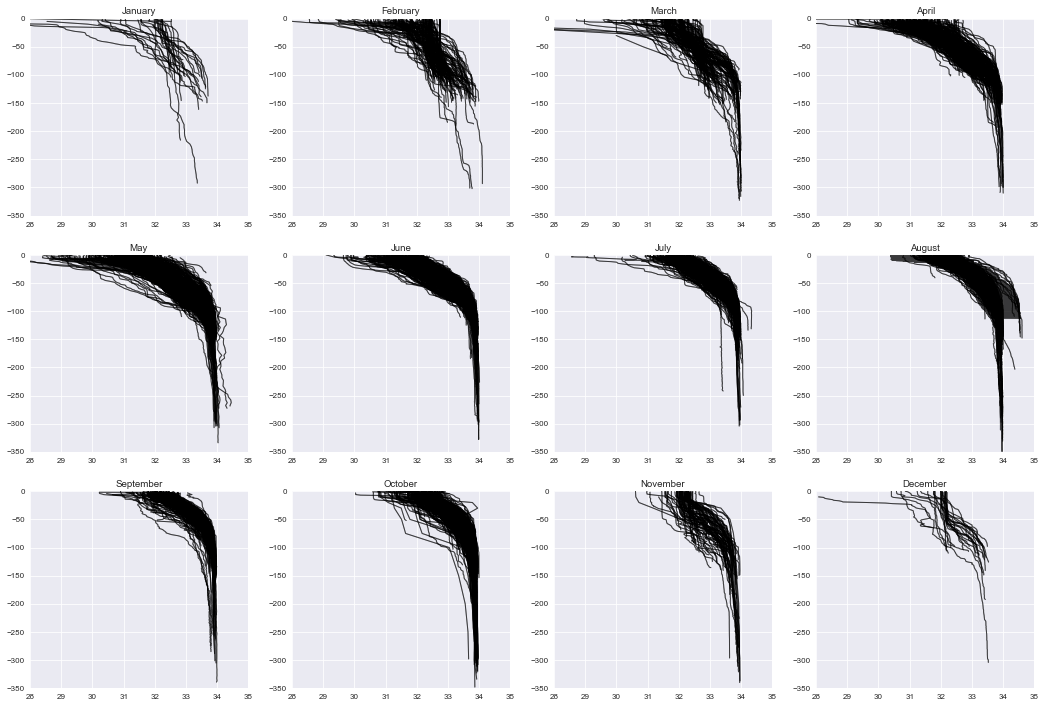

In [40]:
plt.figure(figsize=(18,12))

# get June mode
for mnth in range(1,13):
    plt.subplot(3,4,mnth)
    #Sgr,Tgr,modeDAT,modeIND = TSmode.get_TSmode(mnth_csts[mnth-1])
    #print 'S:', Sgr[modeIND[0]], '-', Sgr[modeIND[0]+1]
    #print 'T:', Tgr[modeIND[1]], '-', Tgr[modeIND[1]+1]
    for c in mnth_csts[mnth-1]:
        plt.plot(c['Salinity'],-np.array(c['Depth']),'-k',lw=1,alpha=0.5)
    plt.xlim((28,35))
    plt.ylim((-350,0))
    plt.title(calendar.month_name[mnth])

plt.show()

> using  1936  cast data


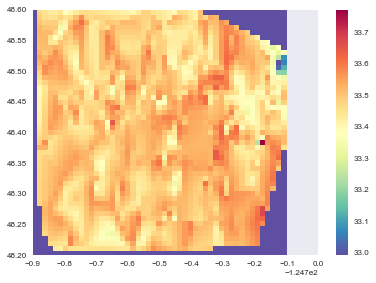

In [4]:
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ACTDR.CTD_DAT,26.5,'Salinity',[-125.6,-124.8],[48.2,48.6])

plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((np.nanmin(grid_dat),np.nanmax(grid_dat)))
plt.colorbar()
plt.show()

> using  1937  cast data


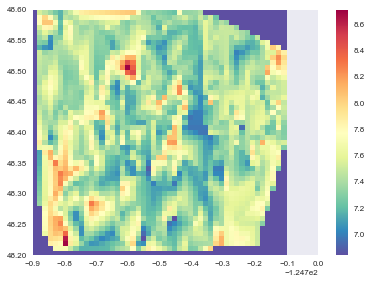

In [6]:
(lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(ACTDR.CTD_DAT,26.5,'Temperature',[-125.6,-124.8],[48.2,48.6])

plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
plt.clim((np.nanmin(grid_dat),np.nanmax(grid_dat)))
plt.colorbar()
plt.show()

> using  3563  cast data
> using  5300  cast data
> using  5259  cast data
> using  6095  cast data
> using  9806  cast data
> using  8353  cast data
> using  7932  cast data
> using  8171  cast data
> using  6177  cast data
> using  6193  cast data
> using  4180  cast data
> using  1996  cast data


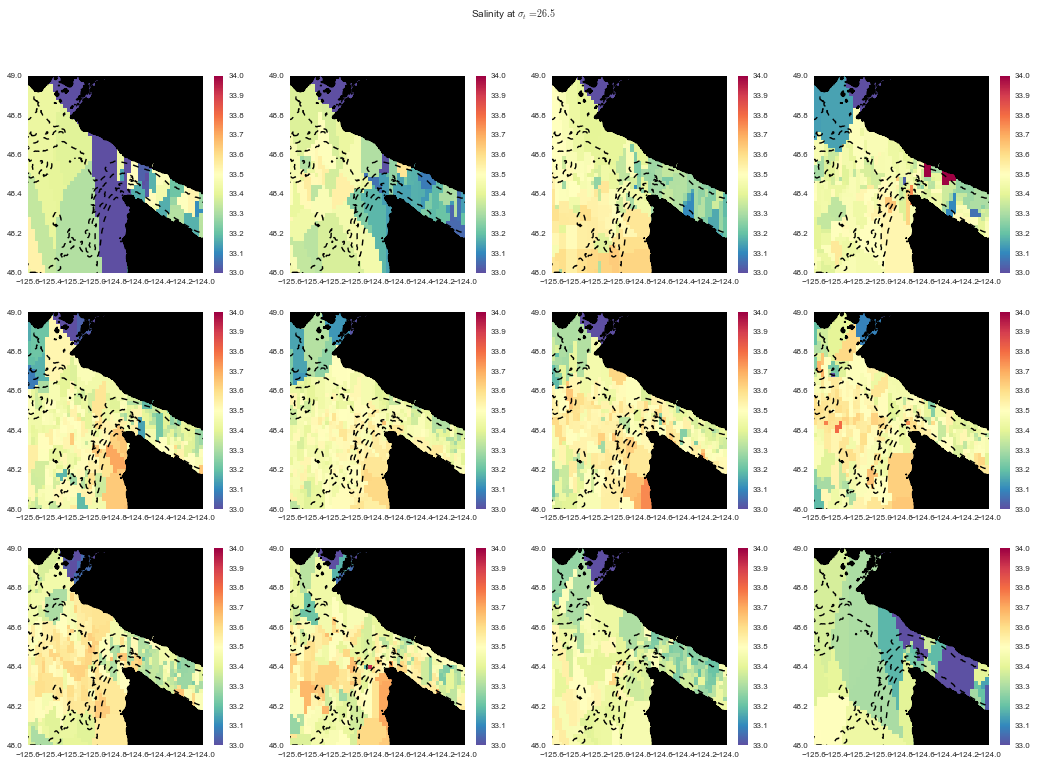

In [21]:
plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat) = TSmode.get_isopyc_surface(mnth_csts[ii-1],26.5,'Salinity',[-125.6,-124],[48,49])
    plt.pcolor(lon_region,lat_region,grid_dat,cmap='Spectral_r')
    plt.clim((33,34))
    plt.colorbar()
    plt.contour(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[-250,-100,0],colors='k')
    plt.contourf(wcvi_top['lon'],wcvi_top['lat'],wcvi_top['dpth'],[0,0],colors='k',lw=1)
    plt.xlim((-125.6,-124))
    plt.ylim((48,49))
plt.suptitle(r'Salinity at $\sigma_t = 26.5$')
plt.show()

In [7]:
print wcvi_top['dpth']

[[-2677.         -2677.         -2677.         ...,   158.26173855
    173.741338     170.46942454]
 [-2676.45594873 -2676.50077084 -2676.54554952 ...,   153.56001547
    164.74749642   169.48690795]
 [-2676.         -2676.         -2676.         ...,   164.6487542
    162.80626303   172.2211213 ]
 ..., 
 [-2339.70750595 -2339.30239248 -2338.9178245  ...,  1282.22271426
   1231.10672074  1146.57431515]
 [-2336.77748198 -2336.99302903 -2337.39254668 ...,  1189.10680613
   1148.62749758  1089.63156776]
 [-2334.9322524  -2335.73256498 -2336.19822489 ...,  1082.44265061
   1027.37395113   986.71827355]]


In [12]:
!ls

20150605_ALL.dat       csvWOD.pyc		  JdFE_v02.dat
20150605_ALL_filt.dat  DB_v01_and_JdFE_v01.ipynb  NOAA_v01.dat
20150605_IOS.dat       DB_v01.dat		  test.dat
20150605_NOAA.dat      ios_ctd.py		  TSmode.py
ACTDR.py	       ios_ctd.py~		  TSmode.py~
ACTDR.py~	       ios_ctd.pyc		  TSmode.pyc
ACTDR.pyc	       IOS_v01.dat		  TSmode_test.ipynb
csvWOD.py	       JdFE_v01.dat
